In [1]:
import biovol_cal as bcal
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pathlib
import os
import pandas as pd

# Biovol with LC

In [2]:
source_dir = r"..\FlowCam_sample_data"

In [3]:
# Find LabelChecker*.csv

LC_files = []
for file_path in pathlib.Path(source_dir).rglob("LabelChecker*.csv"):
    LC_files.append(str(file_path))

print(f"Found {len(LC_files)} LabelChecker file(s) in {source_dir}")
print(LC_files)

Found 1 LabelChecker file(s) in ..\FlowCam_sample_data
['..\\FlowCam_sample_data\\LabelChecker_Dag_20230314_1m_4x-01.csv']


In [4]:
# Process everything

for LC_file in LC_files:
    print(f"Processing {LC_file}")
    source_path = os.path.dirname(LC_file)
    df = pd.read_csv(LC_file)

    for index, row in df.iterrows():

        print(f"Processing row {index + 1} of {len(df)}")

        CollageFile_path = os.path.join(source_path, row["CollageFile"])

        x = row["ImageX"]
        y = row["ImageY"]
        width = row["ImageW"]
        height = row["ImageH"]

        try : 
            gray_img, rgb_img = bcal.get_nparray_from_tiff(CollageFile_path, x, y, width, height)
            result = bcal.biovolume(gray_img)
            df.at[index, 'BiovolumeSphere'] = result[1]
            df.at[index, 'Ch1Area'] = result[2]
        except Exception as e:
            print(f"Error processing image {index + 1} : {str(e)}")
            df.at[index, 'BiovolumeSphere'] = 'error'
            df.at[index, 'Ch1Area'] = 'error'

    df.to_csv(LC_file, index=False)

Processing ..\FlowCam_sample_data\LabelChecker_Dag_20230314_1m_4x-01.csv
Processing row 1 of 1052
Processing row 2 of 1052
Processing row 3 of 1052
Processing row 4 of 1052
Processing row 5 of 1052
Processing row 6 of 1052
Processing row 7 of 1052
Processing row 8 of 1052
Processing row 9 of 1052
Processing row 10 of 1052
Processing row 11 of 1052
Processing row 12 of 1052
Processing row 13 of 1052
Processing row 14 of 1052
Processing row 15 of 1052
Processing row 16 of 1052
Processing row 17 of 1052
Processing row 18 of 1052
Processing row 19 of 1052
Processing row 20 of 1052
Processing row 21 of 1052
Processing row 22 of 1052
Processing row 23 of 1052
Processing row 24 of 1052
Processing row 25 of 1052
Processing row 26 of 1052
Processing row 27 of 1052
Processing row 28 of 1052
Processing row 29 of 1052
Processing row 30 of 1052
Processing row 31 of 1052
Processing row 32 of 1052


c:\Users\acer\Desktop\Work_IGB\my_work_at_igb\FlowCam\biovolume\biovol_cal.py:452: RuntimeWarning: divide by zero encountered in scalar divide
  orientation = (180 / np.pi) * np.arctan(y / x) - 90


Processing row 33 of 1052
Processing row 34 of 1052
Processing row 35 of 1052
Processing row 36 of 1052
Processing row 37 of 1052
Processing row 38 of 1052
Processing row 39 of 1052
Processing row 40 of 1052
Processing row 41 of 1052
Processing row 42 of 1052
Processing row 43 of 1052
Processing row 44 of 1052
Processing row 45 of 1052
Processing row 46 of 1052
Processing row 47 of 1052
Processing row 48 of 1052
Processing row 49 of 1052
Processing row 50 of 1052
Processing row 51 of 1052
Processing row 52 of 1052
Processing row 53 of 1052
Processing row 54 of 1052
Processing row 55 of 1052
Processing row 56 of 1052
Processing row 57 of 1052
Processing row 58 of 1052
Processing row 59 of 1052
Processing row 60 of 1052
Processing row 61 of 1052
Processing row 62 of 1052
Processing row 63 of 1052
Processing row 64 of 1052
Processing row 65 of 1052
Processing row 66 of 1052
Processing row 67 of 1052
Processing row 68 of 1052
Processing row 69 of 1052
Processing row 70 of 1052
Processing r

# Debugging

Edge detection algorithm used : sobel
Formular used : ['Sor']
Biovol for each blob : [np.float64(29708.29371838655)]
Total biovol : 29708.29371838655
Total surface area : 8395.570894580344


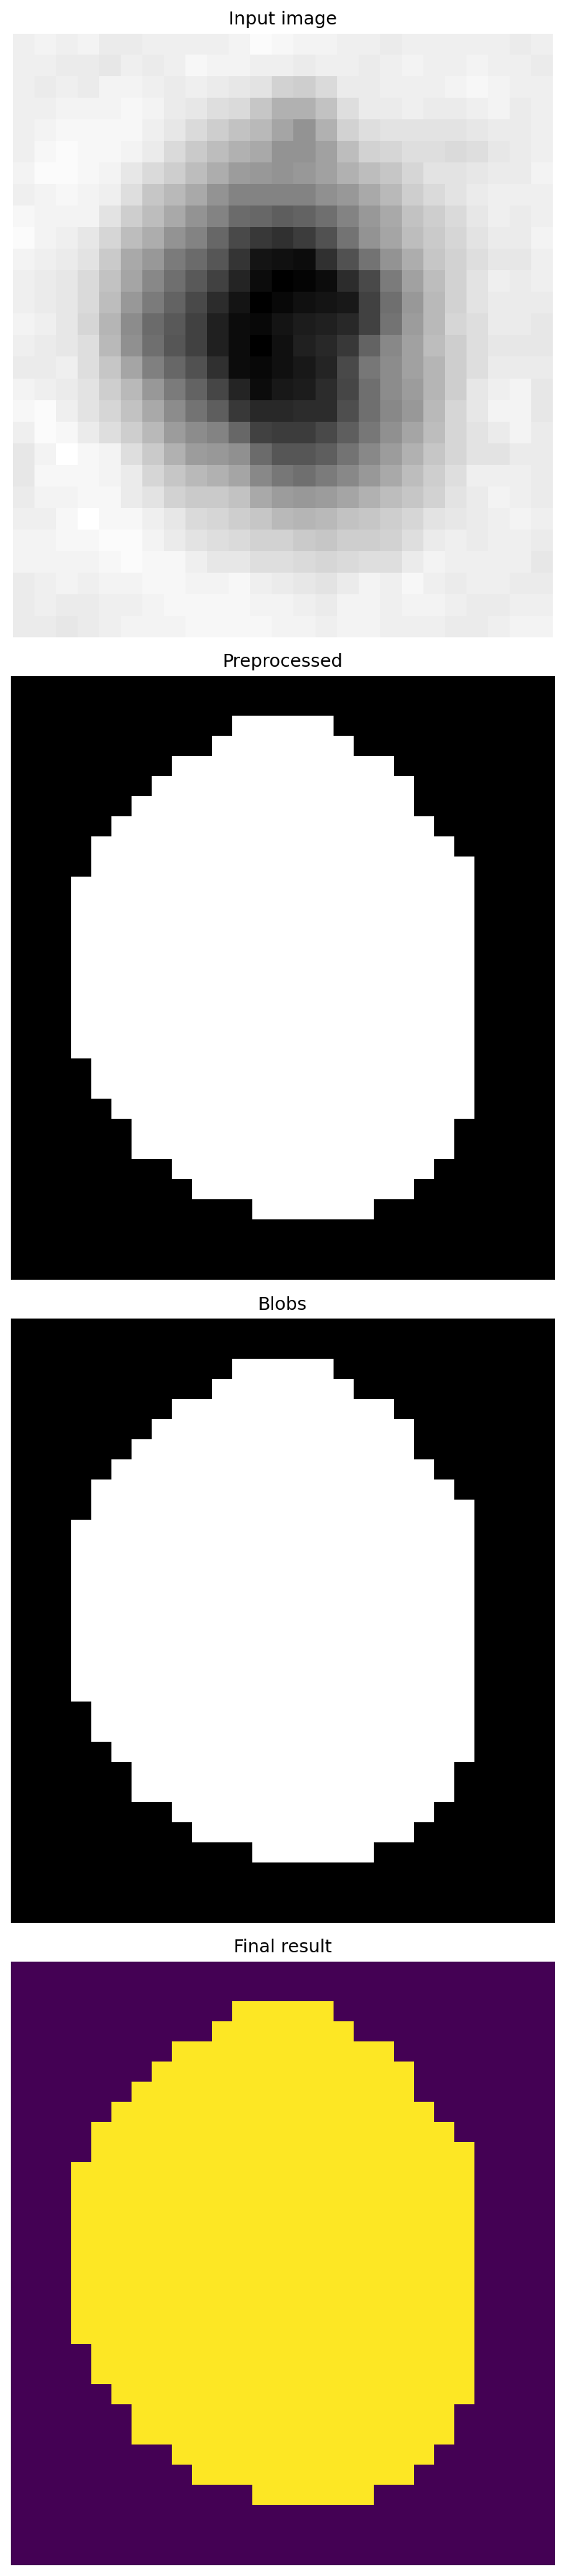

In [5]:
# Set input image path
ID = 12
input_path = r"..\FlowCam_sample_data\LabelChecker_Dag_20230314_1m_4x-01.csv"

# Load image
CollageFile_path, x, y, w, h = bcal.view_LC_by_ID(input_path, ID)
image, _ = bcal.get_nparray_from_tiff(CollageFile_path, x, y, w, h)

# Calculate biovolume
result_mask, total_biovol, total_surface_area = bcal.biovolume(image, debug = True)

# Pixel volume calibration

Calculate equivalent diameter of the 50mm bead and then put the result into bead_equiv_diameter in biovol_cal.py

In [ ]:
def view_LC_by_ID(input_path, ID):
    df = pd.read_csv(input_path)
    temp_df = df.loc[df['Particle ID'] == ID, ['Image X', 'Image Y', 'Image Width', 'Image Height', 'Image File']]
    if not temp_df.empty:
        x = temp_df.iloc[0]['Image X']
        y = temp_df.iloc[0]['Image Y']
        w = temp_df.iloc[0]['Image Width']
        h = temp_df.iloc[0]['Image Height']
    source_path = os.path.dirname(input_path)
    CollageFile_path = os.path.join(source_path, temp_df.iloc[0]['Image File'])

    print(f"x = {x}")
    print(f"y = {y}")
    print(f"width = {w}")
    print(f"height = {h}")
    print(f"input_path = r\"{CollageFile_path}\"")

    try:
        with Image.open(CollageFile_path) as img:
            box = (x, y, x + w, y + h)
            img = np.array(img.crop(box))
    except Exception as e:
        print(f"Error processing image: {str(e)}")

    plt.imshow(img)
    return img

CollageFile_path = r"C:\Users\acer\Desktop\Work_IGB\FlowCam\BEADS50_20250125_4x_03_cor\temp.csv"

img = view_LC_by_ID(CollageFile_path, 1)

In [ ]:
removebg_image = bcal.remove_background(img)
print(f"Dim = {removebg_image.shape}")
print(f"dtype = {removebg_image.dtype}")
plt.imshow(removebg_image, cmap='gray')

In [ ]:
clean_binary_image = bcal.denoise(removebg_image)
print(f"Dim = {clean_binary_image.shape}")
print(f"dtype = {clean_binary_image.dtype}")
plt.imshow(clean_binary_image, cmap='gray')

In [ ]:
count = np.sum(clean_binary_image == 255)
equivalent_diameter = bcal.calculate_equivalent_diameter(count)
print(f"Put this number into biovol_cal.py : bead_equiv_diameter = {equivalent_diameter}")

# Experimentation : 3D image

In [ ]:
import numpy as np
import nibabel as nib

def height_map_to_3d_binary(height_map, output_path, margin=20):
    """
    Convert a height map numpy array to a 3D binary image centered along the Z axis.
    Z thickness is automatically calculated as max_height + margin.
    
    Parameters:
    -----------
    height_map : numpy.ndarray
        Height map as a 2D numpy array
    output_path : str
        Path to save the output .nii.gz file
    margin : int
        Additional space to add to the z_thickness beyond the max height
    """
    # Get image dimensions
    height, width = height_map.shape
    
    # Find the maximum height in the map
    max_height = np.max(height_map)
    
    # Calculate z_thickness automatically
    z_thickness = int(max_height) + margin
    
    # Create a 3D binary volume
    volume = np.zeros((height, width, z_thickness), dtype=np.uint8)
    
    # Fill the volume based on height values
    for y in range(height):
        for x in range(width):
            if height_map[y, x] > 0:
                # Calculate the height in voxels
                h_voxels = int(height_map[y, x])
                
                # Center around Z axis
                start_z = (z_thickness - h_voxels) // 2
                end_z = start_z + h_voxels
                
                # Make sure we don't go out of bounds
                if end_z > z_thickness:
                    end_z = z_thickness
                
                # Fill the corresponding voxels
                volume[y, x, start_z:end_z] = 1
    
    # Create a NIfTI image with identity affine
    affine = np.eye(4)
    nifti_img = nib.Nifti1Image(volume, affine)
    
    # Save the image as .nii.gz
    nib.save(nifti_img, output_path)
    
    print(f"3D binary image saved to {output_path}")
    print(f"Maximum height: {max_height}")
    print(f"Z thickness: {z_thickness} (max_height + {margin} margin)")
    print(f"Volume dimensions: {volume.shape}")

In [ ]:
# Example: Create a synthetic height map
# Replace this with your actual numpy height map
height_map = result_mask

output_path = "3d_binary_volume.nii.gz"
margin = 20  # Additional space beyond max height

height_map_to_3d_binary(height_map, output_path, margin)

# Method comparison

In [ ]:
import biovol_cal as bcal
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pathlib
import os
import pandas as pd

In [ ]:
import numpy as np
import cv2
from skimage import filters
import matplotlib.pyplot as plt

def convert_to_binary(grayscale_image, method='otsu'):

    # Apply automatic thresholding based on the specified method
    if method == 'otsu':
        # Otsu's method - automatically determines optimal threshold
        threshold_value, binary_image = cv2.threshold(grayscale_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        
    elif method == 'adaptive':
        # Adaptive thresholding - good for images with varying illumination
        binary_image = cv2.adaptiveThreshold(grayscale_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                      cv2.THRESH_BINARY, 11, 2)
        threshold_value = "adaptive (local thresholds)"
        
    elif method == 'triangle':
        # Triangle method from scikit-image
        threshold_value = filters.threshold_triangle(grayscale_image)
        binary_image = (grayscale_image > threshold_value).astype(np.uint8) * 255
        
    elif method == 'yen':
        # Yen's method from scikit-image
        threshold_value = filters.threshold_yen(grayscale_image)
        binary_image = (grayscale_image > threshold_value).astype(np.uint8) * 255
    
    # Invert black and white
    binary_image = 255 - binary_image
    
    return binary_image

In [ ]:
def counter(n):
    # Initialize the count attribute if it doesn't exist
    if not hasattr(counter, "count"):
        counter.count = n
    
    # Increment the counter
    counter.count += 1
    
    # Return the current value
    return counter.count

In [ ]:
ID = 11
input_path = r"..\FlowCam_sample_data\LabelChecker_Dag_20230314_1m_4x-01.csv"

# Load image
CollageFile_path, x, y, w, h = bcal.view_LC_by_ID(input_path, ID)
grayscale_image, rgb_image = bcal.get_nparray_from_tiff(CollageFile_path, x, y, w, h)

binary_img_threshold = convert_to_binary(grayscale_image, method='otsu')
binary_img_processed = bcal.preprocessing(grayscale_image)

print(ID)
plt.figure(figsize=(15, 4))
    
plt.subplot(141)
plt.imshow(rgb_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(142)
plt.imshow(binary_img_threshold, cmap='gray')
plt.title('Thresholding method')
plt.axis('off')

plt.subplot(143)
plt.imshow(binary_img_processed[0], cmap='gray')
plt.title(f'Edge detection method')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
ID = counter(100)
input_path = r"..\FlowCam_sample_data\LabelChecker_Dag_20230314_1m_4x-01.csv"

# Load image
CollageFile_path, x, y, w, h = bcal.view_LC_by_ID(input_path, ID)
grayscale_image, rgb_image = bcal.get_nparray_from_tiff(CollageFile_path, x, y, w, h)
print(f"ID = {ID}")
test = bcal.biovolume(grayscale_image,debug=True)